# 实现《合成孔径雷达成像——算法与实现》中2.3.3

## 图像扭曲或旋转带来的频域表现形式的变化



In [7]:
import numpy as np
from numpy.fft import fft,ifft,fftshift,fft2
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [8]:
#%% 参数设置
M = 256;                #% 矩阵高度
N = 256;                #% 矩阵宽度
top = int(M/8);
bottom = int(M*7/8);
left = int(N/8);
right = int(N*7/8);
theta = np.pi/12;          #% 扭曲或旋转角度

#%% 生成信号
#% 原始信号
S0 = np.zeros([M,N]);
S0[top:bottom,left:right] = 1;

print(S0)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
#% 扭曲信号
S1 = np.zeros([M,N]);
for ii in range(M):
    for jj in range(N):
        x = jj-N/2;
        y = (M-ii)-M/2;
        xx = int(np.round(x+N/2))
        yy = int(M-np.round(x*np.sin(-theta)+y*np.cos(-theta)+M/2))
        if(yy>=0 and yy< M):
            S1[ii,jj] = S0[yy,xx];


In [10]:
#% 旋转信号
S2 = np.zeros([M,N]);
for ii in range(M):
    for jj in range(N):
        x = jj-N/2;
        y = (M-ii)-M/2;
        xx =int( np.round(x*np.cos(-theta)-y*np.sin(-theta)+N/2) )
        yy = int( M-np.round(x*np.sin(-theta)+y*np.cos(-theta)+M/2))
        if(xx>=0 and xx< N and yy>=0 and yy< M):
            S2[ii,jj] = S0[yy,xx];


In [11]:
#%% 二维傅里叶变换
#% 原始信号的二维傅里叶变换
S0_ff = fftshift(fft2(fftshift(S0)));
S0_ff = np.abs(S0_ff);
S0_ff = S0_ff/np.max(np.max(S0_ff));
S0_ff = 20*np.log10(S0_ff+1e-4);
#% 原始信号二维傅里叶变换
S1_ff = fftshift(fft2(fftshift(S1)));
S1_ff = np.abs(S1_ff);
S1_ff = S1_ff/np.max(np.max(S1_ff));
S1_ff = 20*np.log10(S1_ff+1e-4);
#% 原始信号二维傅里叶变换
S2_ff = fftshift(fft2(fftshift(S2)));
S2_ff = np.abs(S2_ff);
S2_ff = S2_ff/np.max(np.max(S2_ff));
S2_ff = 20*np.log10(S2_ff+1e-4);


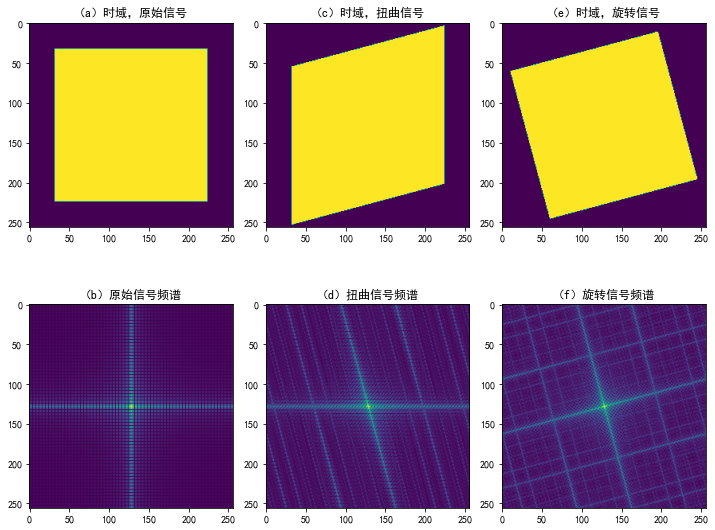

In [12]:
#%% 画图
plt.figure(figsize=(10,8)) #,set(gcf,'Color','w');colormap jet
plt.subplot(2,3,1),
plt.imshow(S0)#;axis image off
plt.title('（a）时域，原始信号');
plt.subplot(2,3,4)
plt.imshow(S0_ff)#;axis image off
plt.title('（b）原始信号频谱');
plt.subplot(2,3,2)#imagesc(S1);axis image off
plt.imshow(S1)
plt.title('（c）时域，扭曲信号');
plt.subplot(2,3,5)#imagesc(S1_ff);axis image off
plt.imshow(S1_ff)
plt.title('（d）扭曲信号频谱');
plt.subplot(2,3,3)#imagesc(S2);axis image off
plt.imshow(S2)
plt.title('（e）时域，旋转信号');
plt.subplot(2,3,6)#imagesc(S2_ff);axis image off
plt.imshow(S2_ff)
plt.title('（f）旋转信号频谱');
plt.tight_layout()


本文Python代码参照Matlab代码自 https://blog.csdn.net/Destiny0321/article/details/53002789?spm=1001.2014.3001.5501